# Phase-space file (PHSP)

Use the output of the following simulation:
- Folder: linac/
- Already computed results in folder results.MD6k/


In [ ]:
# Tell Jupyter to plot figure right in the page
%matplotlib inline

# Module with plot capabilities
import matplotlib.pyplot as plt

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Module to read root files
import uproot

# Modules with reading/write folder/file functions
import os
from pathlib import Path

In [ ]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)

The Current Working Directory (CWD) is: 
 /home/jovyan/work/linac


In [ ]:
# read a PHSP
root_filename = Path('./results.MD6k/output-PhS-g.root')
try:
    f = uproot.open(root_filename)
except Exception:
    print("File '"+root_filename+"' cannot be opened, not root file ?")
    exit()

# Look for a single key named "PhaseSpace"
k = f.keys()
try:
    psf = f['PhaseSpace']
except Exception:
    print("This root file is not a PhaseSpace, keys are: ", f.keys())
    exit()
    psf = f['PhaseSpace']
# now, the variable psf contains a root Tree with various branches: Energy, X, Y, Z etc
print('Read PHSP object', psf)
print("PhaseSpace keys: ", psf.keys())
# all branches are set in the variable 'a'
a = psf.arrays()

Read PHSP object <TTree b'PhaseSpace' at 0x7f09526b1910>
PhaseSpace keys:  [b'Ekine', b'Weight', b'X', b'Y', b'Z', b'dX', b'dY', b'dZ', b'TrackID', b'EventID', b'RunID']


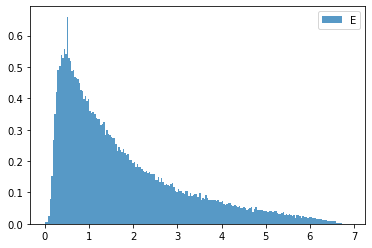

In [ ]:
# Plot the E
nbs = 200
x = a[b'Ekine']
n, bins, patches = plt.hist(x, nbs, density=True, alpha=0.75, label='E')
plt.legend()

Number of elements:  109619


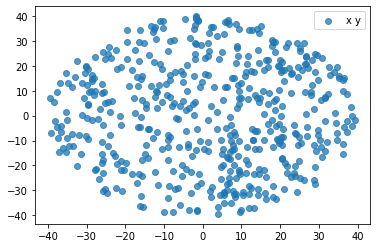

In [ ]:
# Plot the X,Y 
nbs = 200
x = a[b'X']
y = a[b'Y']
print('Number of elements: ', len(x))
# only keep 500 first elements 
n = 500
x = x[:n]
y = y[:n]
plt.scatter(x, y, alpha=0.75, label='x y')
plt.legend()

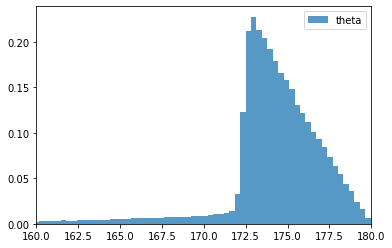

In [ ]:
# Plot the theta angle (main direction dZ
nbs = 500
x = np.rad2deg(np.arccos(a[b'dZ']))
n, bins, patches = plt.hist(x, nbs, density=True, alpha=0.75, label='theta')
plt.xlim(160,180)
plt.legend()

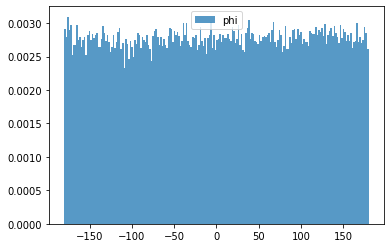

In [ ]:
# Plot the phi angle
nbs = 200
x = np.rad2deg(np.arctan2(a[b'dY'], a[b'dX']))
n, bins, patches = plt.hist(x, nbs, density=True, alpha=0.75, label='phi')
plt.legend()